In [1]:
%matplotlib inline  
import sys, time, os,shutil,datetime, math
import numpy as np
import matplotlib.pylab as plt
from molSimplify.Classes import globalvars
from molSimplify.Classes import mol3D
from molSimplify.Informatics.autocorrelation import*
from molSimplify.Informatics.misc_descriptors import*
from molSimplify.Informatics.RACassemble import*
from molSimplify.Informatics.graph_analyze import*
from molSimplifyAD.ga_tools import* 
import pickle

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
class quickClass:
    def __init__(self,name,descriptor_names,descriptors):
        self.name = name
        self.descriptor_names = descriptor_names
        self.descriptors = descriptors

def write_descriptor_csv(list_of_runs,name):
    with open(name +'.csv','w') as f:
        f.write('runs,')
        n_cols = len(list_of_runs[0].descriptor_names)
        
        for i, names in enumerate(list_of_runs[0].descriptor_names):
            if i < (n_cols - 1):
                f.write(names + ',')
            else:
                f.write(names + '\n')
        for runs in list_of_runs:
            f.write(runs.name)
            
            for properties in runs.descriptors:
                    f.write(','+str(properties))
            f.write('\n')
            
def SMILEs_to_liglist(smilesstr,conatoms):
    this_mol = mol3D()
    this_mol.getOBMol(smilesstr,'smistring')
    this_mol.convert2mol3D()
    this_lig  = ligand(mol3D(), [],len(conatoms))
    this_lig.mol = this_mol
    return(this_lig)

In [27]:
liglistM = list()
with open("../enum/finalSmiMonodentate.txt",'r') as f:
    for line in f:
        liglistM.append(line.split()[0].replace('#4','#'))

liglistB = list()
connectingAtomB = list()
with open("../enum/finalSmiBidentate.txt",'r') as f:
    for line in f:
        liglistB.append(line.split()[0].replace('#4','#'))
        connectingAtomB.append(int(line.split()[2])-1)

liglist = liglistM + liglistB

SMILEs_strings_M = liglistM
SMILEs_strings_B = liglistB
SMILEs_strings = liglist

ligsM = [SMILEs_to_liglist(s,[0]) for s in SMILEs_strings_M] 
ligsB = [SMILEs_to_liglist(s,[0]) for s in SMILEs_strings_B] 
ligs = [SMILEs_to_liglist(s,[0]) for s in SMILEs_strings] 

In [29]:
# ssProj = pickle.load( open( "../enum/strongsymMonodentatesProj.p", "r" ) )
# homoProj = pickle.load( open( "../enum/homolepMonodentatesProj.p", "r" ) ) this is not needed because Proj is just 1 for every lig, so we can use the ligand list from cell above directly
# foProj = pickle.load( open( "../enum/fiveonesymMonodentatesProj.p", "r" ) )
# ftProj = pickle.load( open( "../enum/fourtwosymMonodentatesProj.p", "r" ) )


Starting Homoleptic Bidentates:
--- 0.116961956024 seconds ---
120


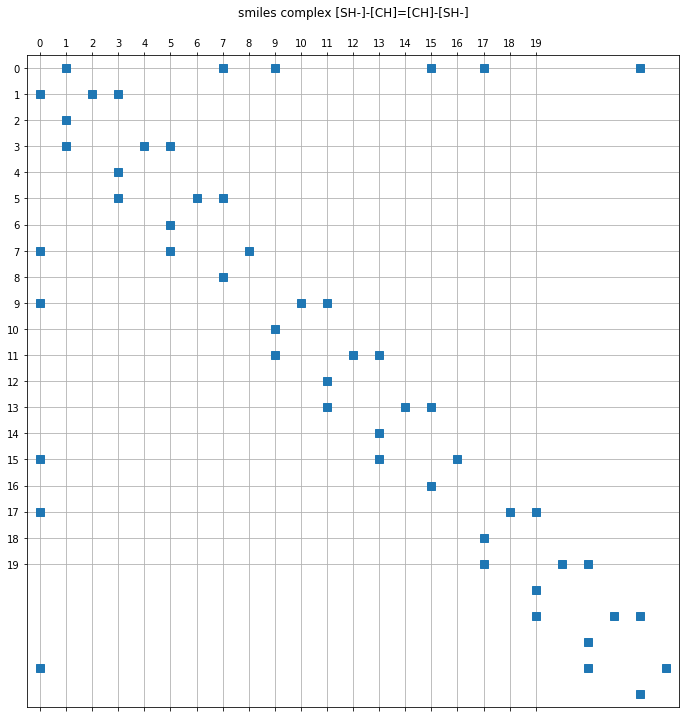

--- 0.383666992188 seconds ---
121


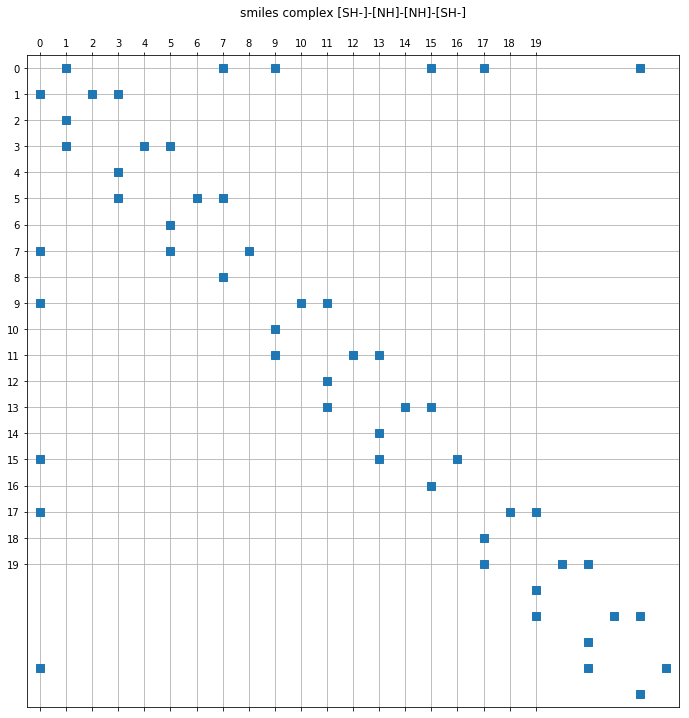

--- 0.62696313858 seconds ---
122


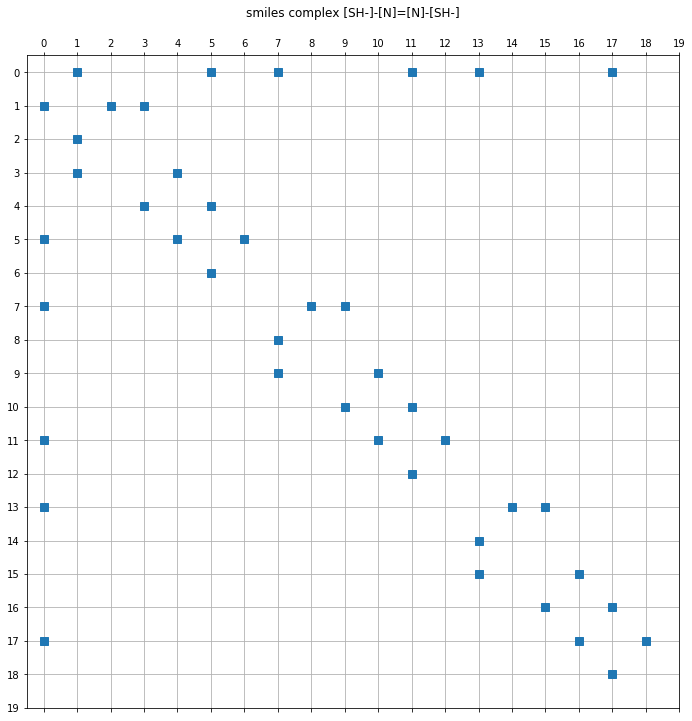

--- 0.878296136856 seconds ---
123


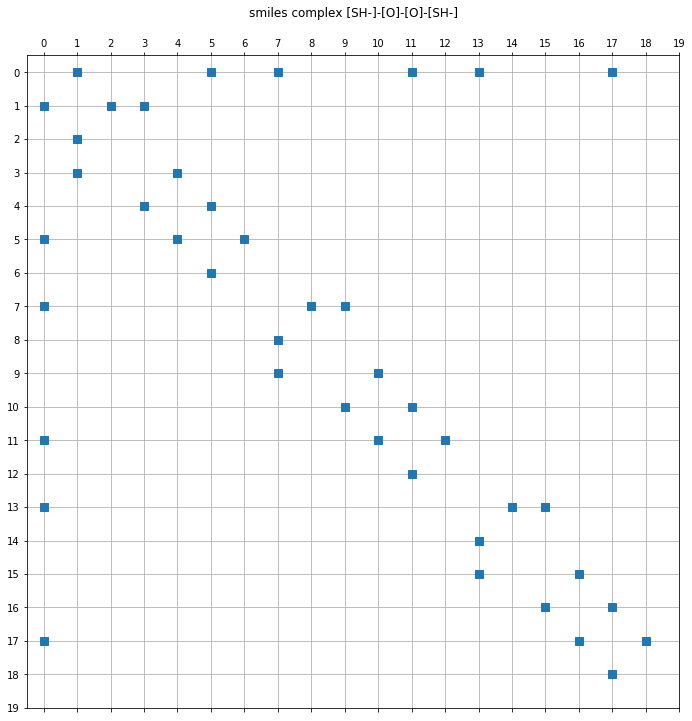

--- 1.25250911713 seconds ---
120


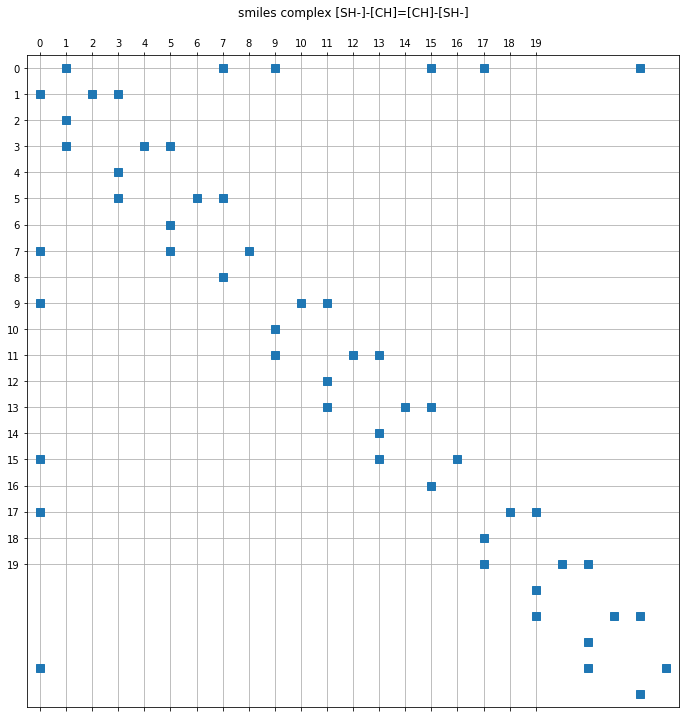

--- 1.51862001419 seconds ---
121


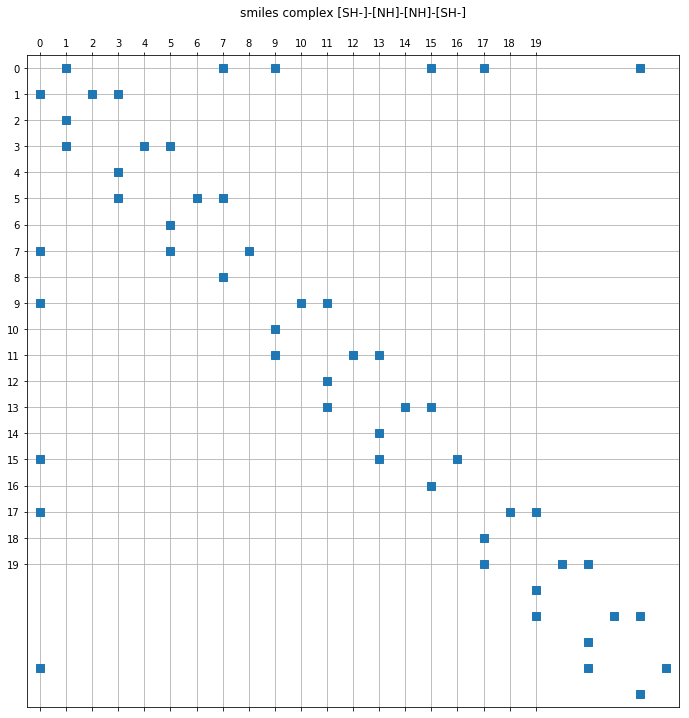

--- 1.76373004913 seconds ---
122


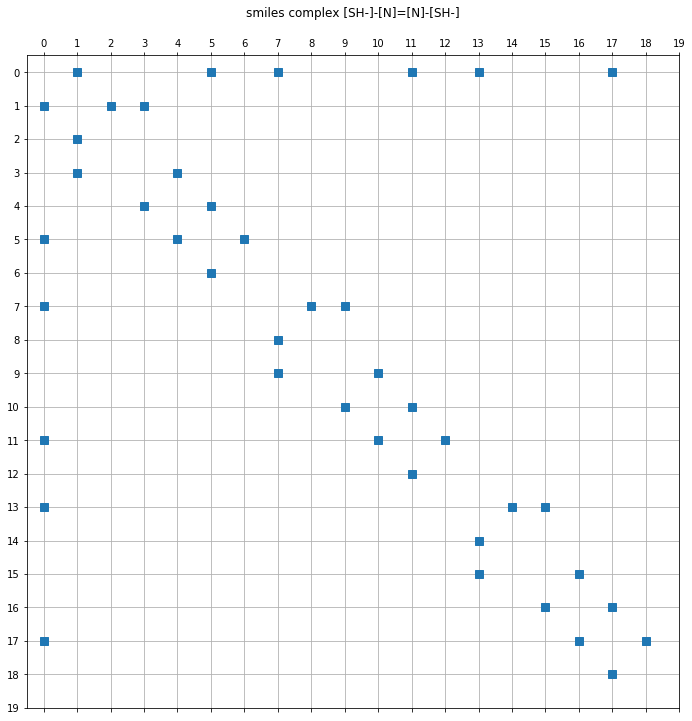

--- 2.0169479847 seconds ---
123


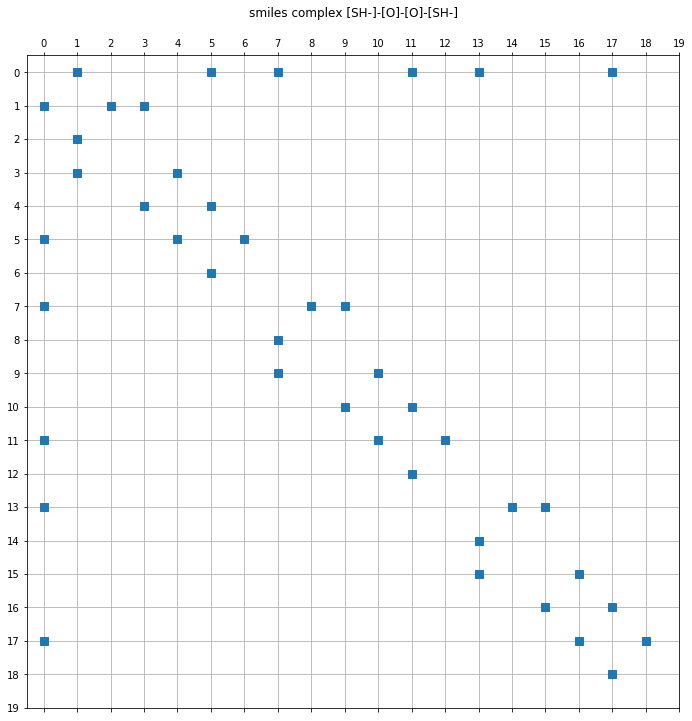

--- 2.27392411232 seconds ---
120


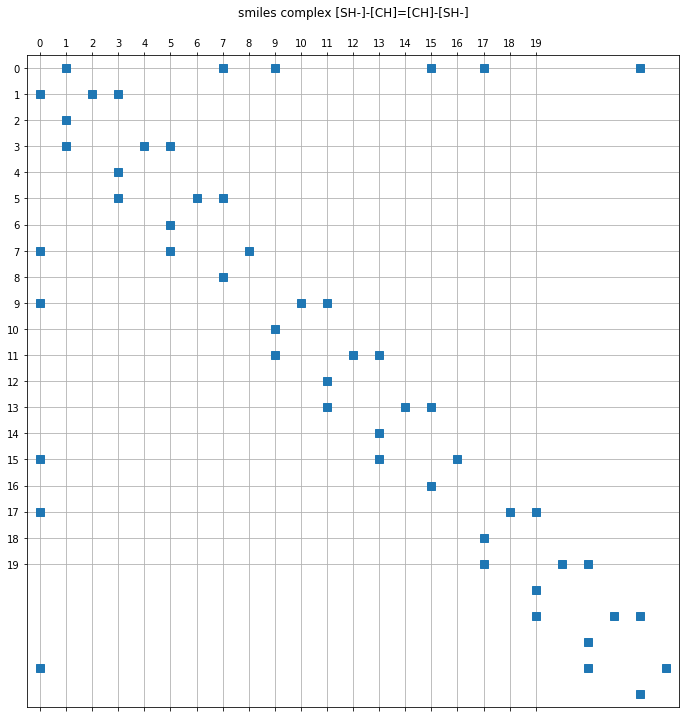

--- 2.52775597572 seconds ---
121


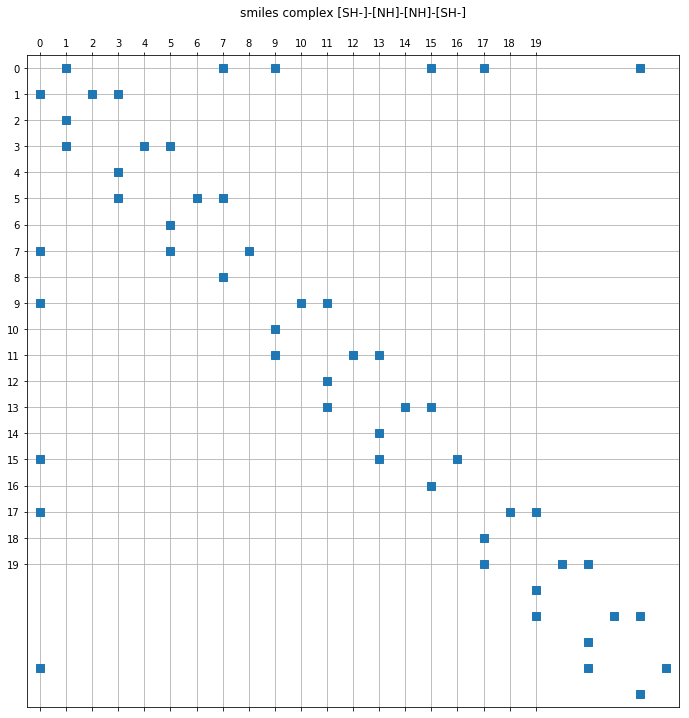

--- 2.75937891006 seconds ---
122


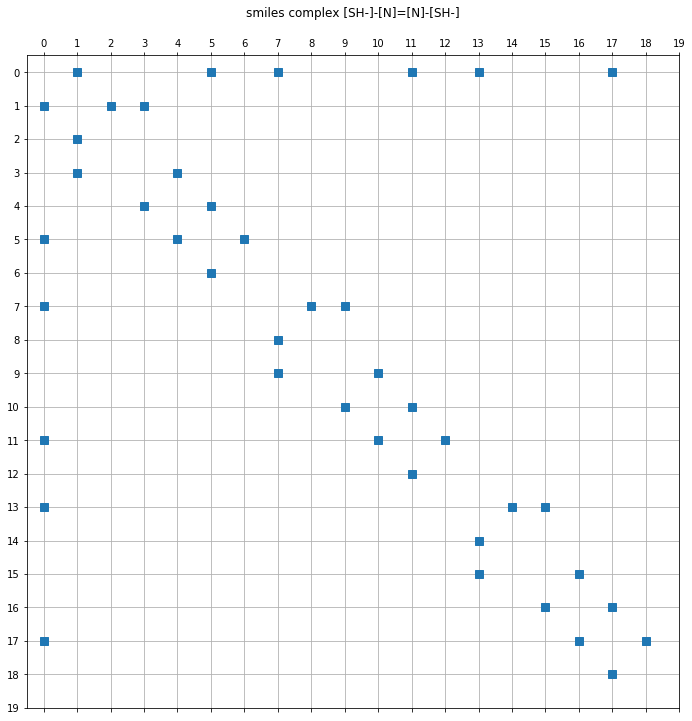

--- 2.99473905563 seconds ---
123


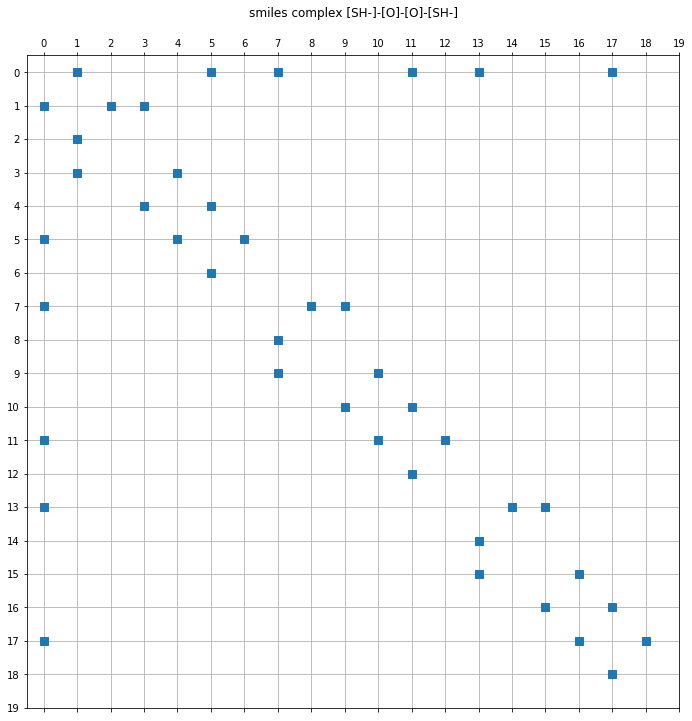

--- 3.2434399128 seconds ---
120


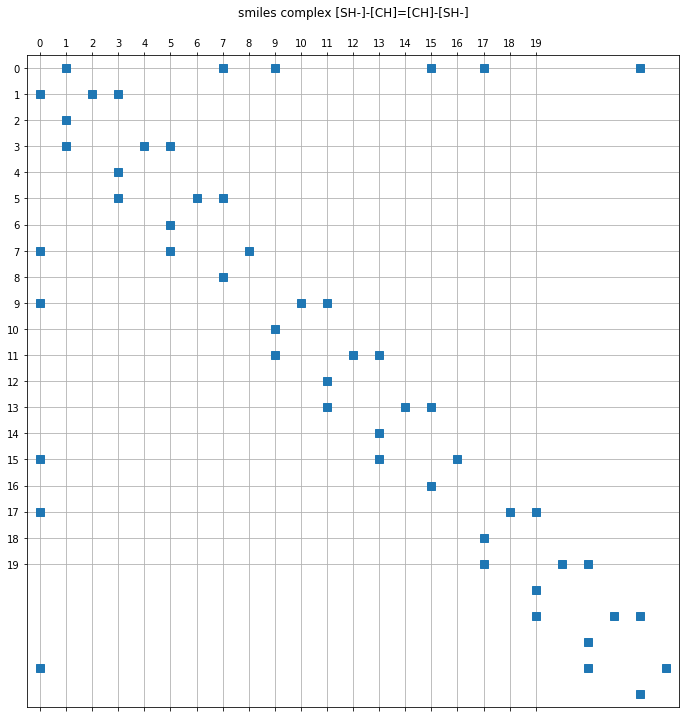

--- 3.49178504944 seconds ---
121


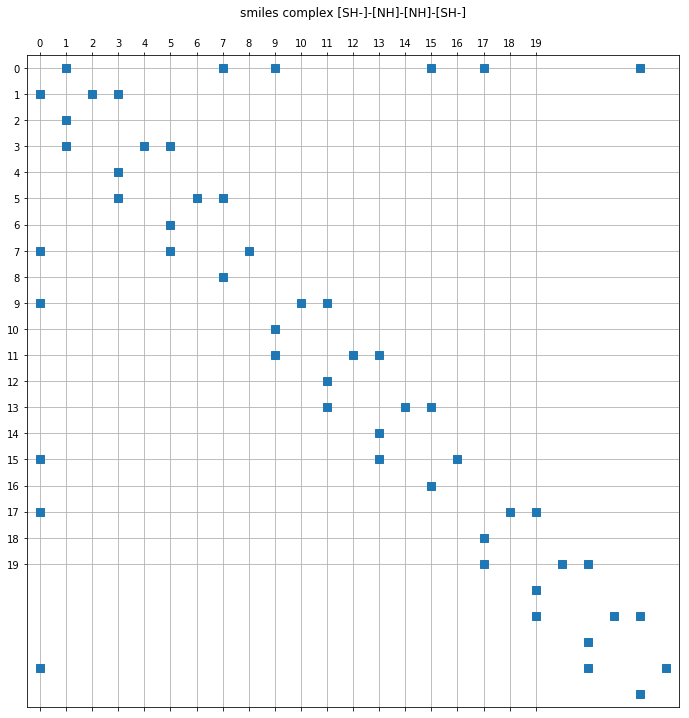

--- 3.72732901573 seconds ---
122


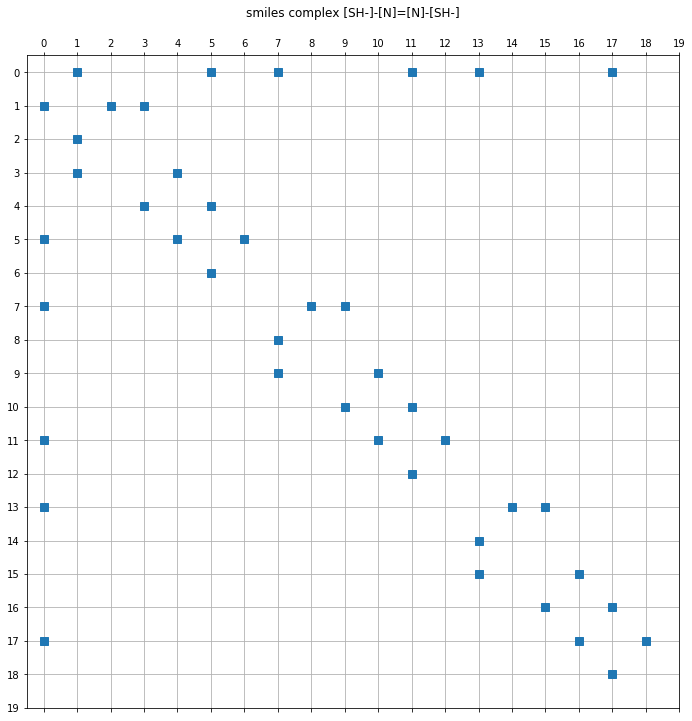

--- 4.05604100227 seconds ---
123


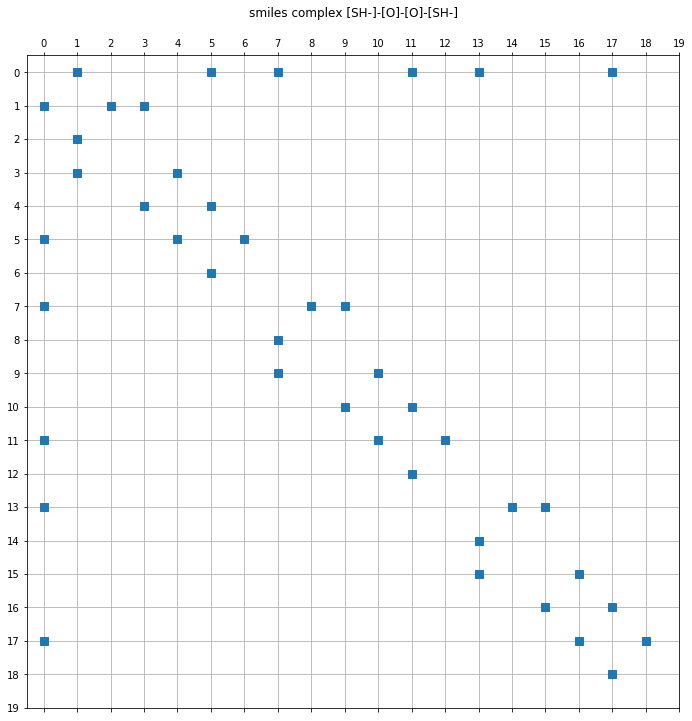

In [77]:
# # homoProj = pickle.load( open( "../enum/homolepMonodentatesProj.p", "r" ) ) 

start_time = time.time()
list_of_runs =[]
list_of_runs =list()

print('Starting Homoleptic Monodentates:')
for metal in ["Cr", "Mn", "Fe", "Co"]: 
    print('Starting with ' + metal)
    for i in range(0,len(liglistM)):
        metal_mol = mol3D()
        metal_mol.addAtom(atom3D(metal)) 

        name = "_".join([metal, 'eq', str(i),'ax', str(i)])
        eq_ligs = 4*[ligsM[i]]
        ax_ligs = 2*[ligsM[i]]
        eq_cons = 4*[[0]]
        ax_cons = 2*[[0]]
        custom_ligand_dict = {"eq_ligand_list":eq_ligs,
                              "ax_ligand_list":ax_ligs,
                              "eq_con_int_list":eq_cons,
                              "ax_con_int_list":ax_cons}

        this_complex = assemble_connectivity_from_parts(metal_mol, custom_ligand_dict)
        con_mat  = this_complex.graph  
        descriptor_names, descriptors = get_descriptor_vector(this_complex, custom_ligand_dict)
        list_of_runs.append(quickClass(name, descriptor_names, descriptors))
        new_time = (time.time() - start_time)
print("Homoleptic monodentates took: " + str(new_time) + ' s.')

print('Starting Homoleptic Bidentates:')
for metal in ["Cr", "Mn", "Fe", "Co"]:    
    for i in range(0,len(liglistB)):
        metal_mol = mol3D()
        metal_mol.addAtom(atom3D(metal)) 

        name = "_".join([metal, 'eq', str(i),'ax', str(i)])
        eq_ligs = 2*[ligsB[i]]
        ax_ligs = 1*[ligsB[i]]
        eq_cons = 2*[[0, connectingAtomB[i] ]]
        ax_cons = 1*[[0, connectingAtomB[i] ]]
        custom_ligand_dict = {"eq_ligand_list":eq_ligs,
                              "ax_ligand_list":ax_ligs,
                              "eq_con_int_list":eq_cons,
                              "ax_con_int_list":ax_cons}

        this_complex = assemble_connectivity_from_parts(metal_mol, custom_ligand_dict)
        con_mat  = this_complex.graph  
        descriptor_names, descriptors = get_descriptor_vector(this_complex, custom_ligand_dict)
        list_of_runs.append(quickClass(name, descriptor_names, descriptors))
        new_time = (time.time() - start_time)

#         plt.figure(figsize=(12,12))
#         plt.spy(con_mat,precision=0.01, markersize=8) 
        
#         plt.xticks(np.arange(0,20))
#         plt.yticks(np.arange(0,20))
#         plt.grid()
#         plt.title('smiles complex ' + liglistB[i])
#         plt.show()       

write_descriptor_csv(list_of_runs,"RAC_ho")

In [100]:
# generate racs for ssMono
ssadcProj = pickle.load( open( "../enum/strongsymMonodentatesProj.p", "r" ) )
start_time = time.time()
# list_of_runs1 =list()

## took 9.5 h
# print('Starting Strongly Symmetric ADC Monodentates:')
# for metal in ["Cr", "Mn", "Fe", "Co"]: 
#     print('Starting with ' + metal)
#     for i in range(0, ssadcProj.shape[0]): 
#         metal_mol = mol3D()
#         metal_mol.addAtom(atom3D(metal)) 
        
#         if ssadcProj[i].data[0] == 4:
#             eq = ssadcProj[i].indices[0]
#             ax = ssadcProj[i].indices[1]
#             name = "_".join([metal, 'eq', str(eq),'ax', str(ax)])
#             eq_ligs = 4*[ligsM[eq]]
#             ax_ligs = 2*[ligsM[ax]]
            
#         elif ssadcProj[i].data[0] == 2:
#             eq = ssadcProj[i].indices[1]
#             ax = ssadcProj[i].indices[0]
#             name = "_".join([metal, 'eq', str(eq),'ax', str(ax)])
#             eq_ligs = 4*[ligsM[eq]]
#             ax_ligs = 2*[ligsM[ax]]
        
#         eq_cons = 4*[[0]]
#         ax_cons = 2*[[0]]

#         custom_ligand_dict = {"eq_ligand_list":eq_ligs,
#                               "ax_ligand_list":ax_ligs,
#                               "eq_con_int_list":eq_cons,
#                               "ax_con_int_list":ax_cons}

#         this_complex = assemble_connectivity_from_parts(metal_mol,custom_ligand_dict)
#         con_mat  = this_complex.graph  
#         descriptor_names, descriptors = get_descriptor_vector(this_complex,custom_ligand_dict)
#         list_of_runs1.append(quickClass(name,descriptor_names,descriptors))
#         new_time = (time.time() - start_time)
# print("Homoleptic strongly symmetric ADC monodentates took: " + str(new_time) + ' s.')
# write_descriptor_csv(list_of_runs1,"RAC_ssadc")

ssadc_b_Proj = pickle.load( open( "../enum/strongsymAdcBidentatesProj.p", "r" ) )
ssadc_b_Proj = ssadc_b_Proj.tocsr()
print(ssadc_b_Proj.get_shape())
list_of_runs2 =list()
print('Starting Strongly Symmetric ADC Bidentates:')
for metal in ["Cr", "Mn", "Fe", "Co"]:  
    print('Starting with ' + metal)
    for i in range(0, 2):  #ssadc_b_Proj.shape[0]
        metal_mol = mol3D()
        metal_mol.addAtom(atom3D(metal)) 

        eq = ssadc_b_Proj[i].indices[1]
        print(ssadc_b_Proj[i])
        ax = ssadc_b_Proj[i].indices[0]
        name = "_".join([metal, 'eq', str(eq),'ax', str(ax)])
        eq_ligs = 2*[ligs[eq]]
        ax_ligs = 2*[ligs[ax]]
        
        eq_cons = 2*[[0, connectingAtomB[i] ]]
        ax_cons = 2*[[0]]
        
        custom_ligand_dict = {"eq_ligand_list":eq_ligs,
                              "ax_ligand_list":ax_ligs,
                              "eq_con_int_list":eq_cons,
                              "ax_con_int_list":ax_cons}

        this_complex = assemble_connectivity_from_parts(metal_mol, custom_ligand_dict)
        con_mat  = this_complex.graph  
        descriptor_names, descriptors = get_descriptor_vector(this_complex, custom_ligand_dict)
        list_of_runs2.append(quickClass(name, descriptor_names, descriptors))
        new_time = (time.time() - start_time)
        
        plt.figure(figsize=(12,12))
        plt.spy(con_mat,precision=0.01, markersize=8) 
        
        plt.xticks(np.arange(0,20))
        plt.yticks(np.arange(0,20))
        plt.grid()
        plt.title('smiles complex ' + liglistB[i])
        plt.show()


print("Homoleptic strongly symmetric ADC Bidentates took: " + str(new_time) + ' s.')

write_descriptor_csv(list_of_runs2,"RAC_ssadc_b")


(59940, 553)
Starting Strongly Symmetric ADC Bidentates:
Starting with Cr
  (0, 404)	1.0
  (0, 552)	1.0


IndexError: index 14 is out of bounds for axis 1 with size 13

In [91]:
type(ssadc_b_Proj.tocsr()[0])

scipy.sparse.csr.csr_matrix

In [250]:
# generate racs for foMono (five-one)
list_of_runs =[]
start_time = time.time()
list_of_runs =list()
for metal in ["Cr", "Mn", "Fe", "Co"]: 
    for i in range(0, foProj.shape[0]): # 
        metal_mol = mol3D()
        metal_mol.addAtom(atom3D(metal)) 
        
        if foProj[i].data[0] == 5:
            f = foProj[i].indices[0]
            o = foProj[i].indices[1]
            name = "_".join([metal, 'f', str(f),'o', str(o)])
            eq_ligs = 4*[ligs[f]]
            ax_ligs = [ligs[f],ligs[o]]
            
        elif foProj[i].data[0] == 1:
            f = foProj[i].indices[1]
            o = foProj[i].indices[0]
            name = "_".join([metal, 'f', str(f),'o', str(o)])
            eq_ligs = 4*[ligs[f]]
            ax_ligs = [ligs[o],ligs[f]]
        
        eq_cons = 4*[[0]]
        ax_cons = 2*[[0]]
        custom_ligand_dict = {"eq_ligand_list":eq_ligs,
                              "ax_ligand_list":ax_ligs,
                              "eq_con_int_list":eq_cons,
                              "ax_con_int_list":ax_cons}

        this_complex = assemble_connectivity_from_parts(metal_mol,custom_ligand_dict)
        con_mat  = this_complex.graph  
        descriptor_names, descriptors = get_descriptor_vector(this_complex,custom_ligand_dict)
        list_of_runs.append(quickClass(name,descriptor_names,descriptors))
        new_time = (time.time() - start_time)

    #     print("--- %s seconds ---" % new_time)
    #     print(i)

    #     plt.spy(con_mat,precision=0.01, markersize=15)    
    #     plt.title('smiles complex ' + liglist[i])
    #     plt.show()
        
print("--- %s seconds ---" % new_time)
# --- 34494.538744 seconds --- = 9.58 h

write_descriptor_csv(list_of_runs,"foRACs")

--- 34391.267837 seconds ---


In [5]:
print('as')

as


In [17]:
# generate racs for ftMono (four-two)
list_of_runs =[]
start_time = time.time()
list_of_runs =list()
for metal in ["Cr", "Mn", "Fe", "Co"]: 
    for i in range(0, ftProj.shape[0]): # ftProj.shape[0]
        metal_mol = mol3D()
        metal_mol.addAtom(atom3D(metal)) 
        
        if ftProj[i].data[0] == 4:
            f = ftProj[i].indices[0]
            t = ftProj[i].indices[1]
            name = "_".join([metal, 'f', str(f),'t', str(t)])
            eq_ligs = 2*[ligs[f],ligs[t]]
            ax_ligs = 2*[ligs[f]]
#             print('four: ' + str(liglist[f]))
#             print('two: ' + str(liglist[t]))

            
        elif ftProj[i].data[0] == 2:
            f = ftProj[i].indices[1]
            t = ftProj[i].indices[0]
            name = "_".join([metal, 'f', str(f),'t', str(t)])
            eq_ligs = 2*[ligs[f],ligs[t]]
            ax_ligs = 2*[ligs[f]]
#             print('four: ' + str(liglist[f]))
#             print('two: ' + str(liglist[t]))
        
        eq_cons = 4*[[0]]
        ax_cons = 2*[[0]]
        custom_ligand_dict = {"eq_ligand_list":eq_ligs,
                              "ax_ligand_list":ax_ligs,
                              "eq_con_int_list":eq_cons,
                              "ax_con_int_list":ax_cons}

        this_complex = assemble_connectivity_from_parts(metal_mol,custom_ligand_dict)
        con_mat  = this_complex.graph  
        descriptor_names, descriptors = get_descriptor_vector(this_complex,custom_ligand_dict)
        list_of_runs.append(quickClass(name,descriptor_names,descriptors))
        new_time = (time.time() - start_time)

#         print("--- %s seconds ---" % new_time)

#         plt.spy(con_mat,precision=0.01, markersize=15)    
#         plt.title('smiles complex ')
#         plt.show()
    print(metal)
    print("--- %s seconds ---" % new_time)
print("--- %s seconds ---" % new_time)
# --- 35126.2804871 seconds --- = 9.75 h

write_descriptor_csv(list_of_runs,"ftRACs")

Cr
--- 8847.10032511 seconds ---
Mn
--- 17560.2080109 seconds ---
Fe
--- 26330.416162 seconds ---
Co
--- 35126.2804871 seconds ---
--- 35126.2804871 seconds ---
